In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import dypy.netcdf as dn
from dypy.plotting import Mapfigure
import matplotlib.pyplot as plt

# Make CESM topography

In [4]:
# Example: load a DSS dataset as a Pandas dataframe
lon_min_CESM = 0
lon_max_CESM = 15
lat_min_CESM = 42
lat_max_CESM = 50
filepath = f"/net/litho/atmosdyn/INTEXseas/cesm/cesm112_LENS/b.e112.B20TRLENS.f09_g16.ethz.001/archive/atm/hist/b.e112.B20TRLENS.f09_g16.ethz.001.cam.h1.1991-01-02-00000.nc"


lons, lats = dn.read_var(filepath, ["lon", "lat"])

xindex = np.where((lons >= lon_min_CESM) & (lons <= lon_max_CESM))[0]
print("xindex: " + str(xindex))
print("lons: " + str(lons[xindex]))
yindex = np.where((lats >= lat_min_CESM) & (lats <= lat_max_CESM))[0]
print("yindex: " + str(yindex))
print("lats: " + str(lats[yindex]))
xmin, xmax = xindex.min(), xindex.max()
print("xmin: " + str(xmin))
print("xmax: " + str(xmax))
ymin, ymax = yindex.min(), yindex.max()
print("ymin: " + str(ymin))
print("ymax: " + str(ymax))

index = np.s_[:, :, ymin:(ymax+1), xmin:(xmax+1)]
PS_values =  np.array(dn.read_var(filepath, ["PS"], index=index))

xindex: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
lons: [ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25 12.5  13.75
 15.  ]
yindex: [141 142 143 144 145 146 147 148]
lats: [42.87958115 43.82198953 44.76439791 45.70680628 46.64921466 47.59162304
 48.53403141 49.47643979]
xmin: 0
xmax: 12
ymin: 141
ymax: 148


In [5]:
lats_labels = ['4287', '4382', '4476', '4570', '4664', '4759', '4853', '4947']
lons_labels = ['0', '125', '250', '375', '500', '625', '750', '875', '1000', '1125', '1250', '1375', '1500']

lats = [int(lat)/100.0 for lat in lats_labels]
lons = [int(lon)/100.0 for lon in lons_labels]

In [91]:
mf.drawmeridians??

Signature:
mf.drawmeridians(
    meridians,
    color='k',
    textcolor='k',
    linewidth=1.0,
    zorder=None,
    dashes=[1, 1],
    labels=[0, 0, 0, 0],
    labelstyle=None,
    fmt='%g',
    xoffset=None,
    yoffset=None,
    ax=None,
    latmax=None,
    **text_kwargs,
)
Source:   
    def drawmeridians(self,meridians,color='k',textcolor='k',linewidth=1., zorder=None,\
                      dashes=[1,1],labels=[0,0,0,0],labelstyle=None,\
                      fmt='%g',xoffset=None,yoffset=None,ax=None,latmax=None,
                      **text_kwargs):
        """
        Draw and label meridians (longitude lines) for values (in degrees)
        given in the sequence ``meridians``.

        .. tabularcolumns:: |l|L|

        ==============   ====================================================
        Keyword          Description
        ==============   ====================================================
        color            color to draw meridians (default black).
       

Saved figure at: /home/chmony/Documents/Results/CESM_grid_points.pdf


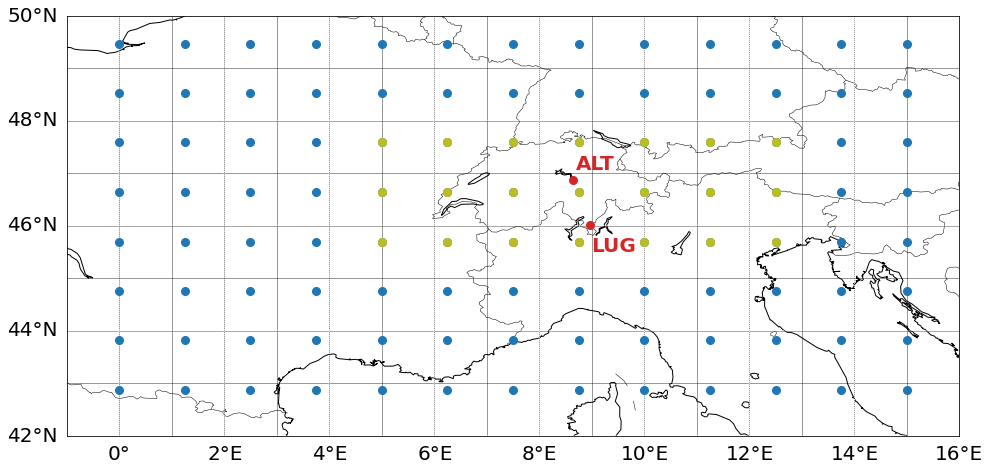

In [106]:
mf = Mapfigure(lon=np.array([-1,16]), lat=np.array([42,50]))
fig = plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 20})

#plt.title(title)
mf.drawmap(nbrem=2, nbrep=2, meridiansargs={"color":"w"}, parallelsargs={"color": "w"})

X= np.array([[x,y] for x in lons for y in lats])
plt.plot(X[:,0], X[:,1],"o", color="tab:blue", markersize=8 ,alpha=1)
X= np.array([[x,y] for x in lons[4:11] for y in lats[3:6]])
plt.plot(X[:,0], X[:,1], "o", color="tab:olive", markersize=8)

color="tab:red"
plt.plot( 8.64441, 46.88042, 'o', color=color,markersize=8)
plt.text( 8.7, 46.99,'ALT',horizontalalignment='left', verticalalignment="bottom", color=color, weight="bold")
plt.plot( 8.96004, 46.01008, 'o', color=color,markersize=8) #Altdorf 8.64441, 46.88042, Lugano: 8.6833, 46.51677
plt.text( 8.99, 45.8,'LUG',horizontalalignment='left', verticalalignment="top", color=color, weight="bold")


for x_pos in range(0,16,1):
    plt.vlines(x_pos, 42,50, linewidth=0.8, alpha=0.5)
    
for y_pos in range(43,50,1):
    plt.hlines(y_pos, -1,16, linewidth=0.8, alpha=0.5)




plt.savefig('/home/chmony/Documents/Results/CESM_grid_points.pdf', bbox_inches='tight', dpi=200)
print("Saved figure at: /home/chmony/Documents/Results/CESM_grid_points.pdf")

(8, 13)
Saved figure at: /home/chmony/Documents/Results/ERAI_CESM_topography.pdf


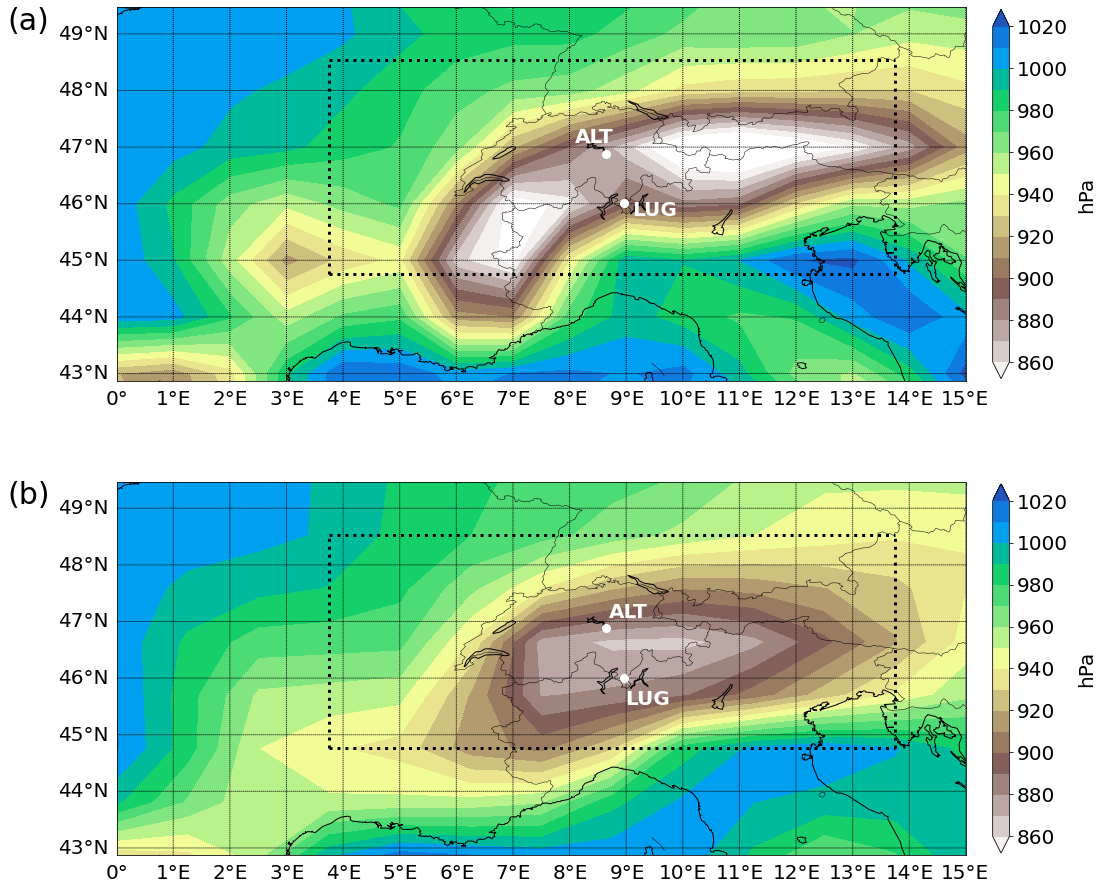

In [28]:
vmin=850
vmax=1035
print(PS_values[0].mean(axis=0).shape)
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(16,2*8))
fig.add_subplot(211)
fig.text(0.03,0.851, "(a)", size=30, ha="left")

mf = Mapfigure(lon=np.array(lons), lat=np.array(lats))
#plt.title(title)
levels=np.arange(vmin, vmax,10)
cnt = plt.contourf(lons_ERA, lats_ERA, PS_average, levels, cmap=plt.cm.get_cmap('terrain_r'), vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('terrain_r'))
m.set_array(PS_average)
m.set_clim(vmin, vmax)
#plt.cm.get_cmap("rocket", 25)
cbar = plt.colorbar(m,
                    boundaries=levels,
                    ticks=levels[1::2],
                    extend="both", fraction=0.0188, pad=0.03)
cbar.set_label("hPa", rotation=90, labelpad=10)
color="black"
plt.plot([3.75,13.75],[44.76,44.76],":", color=color, linewidth=3)
plt.plot([3.75,13.75],[48.53,48.53],":", color=color, linewidth=3)
plt.plot([3.75,3.75],[44.76,48.53],":", color=color, linewidth=3)
plt.plot([13.75,13.75],[44.76,48.53],":", color=color,linewidth=3)
mf.drawmap(nbrem=1, nbrep=1)
plt.plot( 8.64441, 46.88042, 'o', color="w",markersize=8)
plt.text( 8.1, 47.01,'ALT',horizontalalignment='left', verticalalignment="bottom", color="w", weight="bold")
plt.plot( 8.96004, 46.01008, 'o', color="w",markersize=8) #Altdorf 8.64441, 46.88042, Lugano: 8.6833, 46.51677
plt.text( 9.1, 46.05,'LUG',horizontalalignment='left', verticalalignment="top", color="w", weight="bold")


fig.add_subplot(212)
fig.text(0.03,0.44, "(b)", size=30, ha="left")
mf = Mapfigure(lon=np.array(lons), lat=np.array(lats))



levels=np.arange(vmin, vmax,10)
#plt.title(title)
cnt = plt.contourf(lons, lats, PS_values[0].mean(axis=0)/100, levels, cmap=plt.cm.get_cmap('terrain_r'), vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('terrain_r'))
m.set_array(PS_values[0].mean(axis=0)/100)
m.set_clim(vmin, vmax)
#plt.cm.get_cmap("rocket", 25)
cbar = plt.colorbar(m,
                    boundaries=levels,
                    ticks=levels[1::2],
                    extend="both", fraction=0.0188, pad=0.03)
cbar.set_label("hPa", rotation=90, labelpad=10)
color="black"
plt.plot([3.75,13.75],[44.76,44.76],":", color=color, linewidth=3)
plt.plot([3.75,13.75],[48.53,48.53],":", color=color, linewidth=3)
plt.plot([3.75,3.75],[44.76,48.53],":", color=color, linewidth=3)
plt.plot([13.75,13.75],[44.76,48.53],":", color=color,linewidth=3)
mf.drawmap(nbrem=1, nbrep=1)
plt.plot( 8.64441, 46.88042, 'o', color="w",markersize=8)
plt.text( 8.7, 46.99,'ALT',horizontalalignment='left', verticalalignment="bottom", color="w", weight="bold")
plt.plot( 8.96004, 46.01008, 'o', color="w",markersize=8) #Altdorf 8.64441, 46.88042, Lugano: 8.6833, 46.51677
plt.text( 8.99, 45.8,'LUG',horizontalalignment='left', verticalalignment="top", color="w", weight="bold")


plt.savefig('/home/chmony/Documents/Results/ERAI_CESM_topography.pdf', bbox_inches='tight', dpi=200)
print("Saved figure at: /home/chmony/Documents/Results/ERAI_CESM_topography.pdf")

In [9]:
PS_values[0].mean(axis=0).min()/100

866.29484375

# Make ERAI topography

In [10]:
years = np.arange(1991,1991+1)
years = [str(year) for year in years]

months = np.arange(1,12+1)
months = [str(month) for month in months]

days = np.arange(1,31+1)
days = [str(day) for day in days]

hours =["00", "06", "12", "18"]

#months[0] = "0" + months[0]
    
for i in range(0,9):
    months[i] = "0" + months[i]
    days[i] = "0" + days[i]

print(years)
print(months)
print(days)
print(hours)

['1991']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
['00', '06', '12', '18']


In [11]:
# W-E direction
lon_min_ERA= 0
lon_max_ERA = 15

# S-N direction
lat_min_ERA= 42
lat_max_ERA = 50

lats_ERA = range(lat_min_ERA, lat_max_ERA+1)
lons_ERA = range(lon_min_ERA, lon_max_ERA+1)


In [12]:
rootpath = "/net/bio/atmosdyn/erainterim/cdf/"

PS_average = np.zeros((lat_max_ERA-lat_min_ERA+1, lon_max_ERA-lon_min_ERA+1))
counter=0
for year in years:
    print("Year: " + year)
    yearpath = rootpath + year + "/"

    for month in months:
        monthpath = yearpath + month + "/"

        for day in days:
            print(day)

            for hour in hours:

                feature_dict = {"date": year + "-" + month +"-" + day + " " + hour + ":00"}
                filepath = monthpath + "P"+ year + month + day + "_" + hour
                try:
                    PS, = dn.read_var(filepath, ['PS'])
                    counter+=1
                except:
                    print("Couldn't read file: " + "P" + year + month + day +"_" +hour)
                    feature_dict.clear()
                    break

                PS_cut = PS[(lat_min_ERA+90):(lat_max_ERA+90+1),(180+lon_min_ERA):(180+lon_max_ERA+1)]
                PS_average+=PS_cut

PS_average=PS_average/counter


Year: 1991
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Couldn't read file: P19910229_00
30
Couldn't read file: P19910230_00
31
Couldn't read file: P19910231_00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
Couldn't read file: P19910431_00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
Couldn't read file: P19910631_00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27

Saved figure at: /home/chmony/Documents/Results/ERAI_topography.pdf


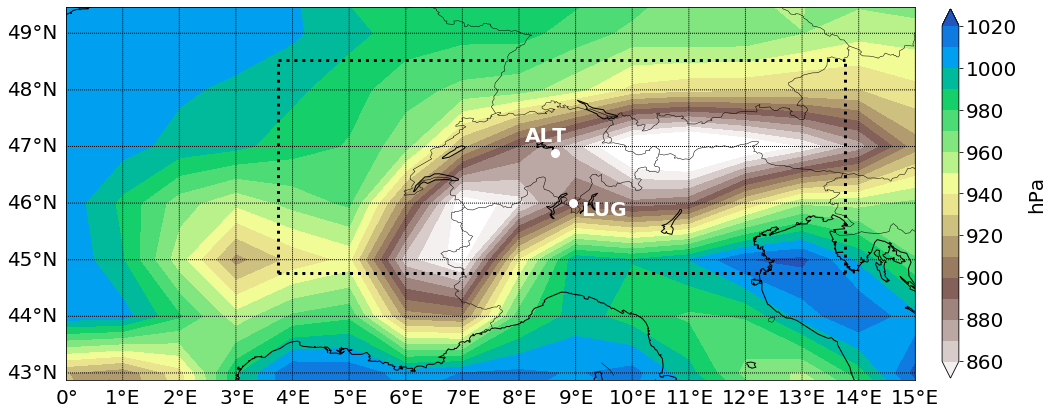

In [25]:

vmin=850
vmax=1035

mf = Mapfigure(lon=np.array(lons), lat=np.array(lats))
fig = plt.figure(figsize=(16,9))
#plt.title(title)
levels=np.arange(vmin, vmax,10)
cnt = plt.contourf(lons_ERA, lats_ERA, PS_average, levels, cmap=plt.cm.get_cmap('terrain_r'), vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('terrain_r'))
m.set_array(PS_average)
m.set_clim(vmin, vmax)
#plt.cm.get_cmap("rocket", 25)
cbar = plt.colorbar(m,
                    boundaries=levels,
                    ticks=levels[1::2],
                    extend="both", fraction=0.0188, pad=0.03)
cbar.set_label("hPa", rotation=90, labelpad=10)
color="black"
plt.plot([3.75,13.75],[44.76,44.76],":", color=color, linewidth=3)
plt.plot([3.75,13.75],[48.53,48.53],":", color=color, linewidth=3)
plt.plot([3.75,3.75],[44.76,48.53],":", color=color, linewidth=3)
plt.plot([13.75,13.75],[44.76,48.53],":", color=color,linewidth=3)
mf.drawmap(nbrem=1, nbrep=1)
plt.plot( 8.64441, 46.88042, 'o', color="w",markersize=8)
plt.text( 8.1, 47.01,'ALT',horizontalalignment='left', verticalalignment="bottom", color="w", weight="bold")
plt.plot( 8.96004, 46.01008, 'o', color="w",markersize=8) #Altdorf 8.64441, 46.88042, Lugano: 8.6833, 46.51677
plt.text( 9.1, 46.05,'LUG',horizontalalignment='left', verticalalignment="top", color="w", weight="bold")

plt.savefig('/home/chmony/Documents/Results/ERAI_topography.pdf', bbox_inches='tight', dpi=200)
print("Saved figure at: /home/chmony/Documents/Results/ERAI_topography.pdf")

In [12]:
PS_average.min()

818.2775151082914

In [26]:
path_topo = "/net/bio/atmosdyn/erainterim/const/TOPO"
dn.read_variables(path_topo)
topo = np.array(dn.read_var(path_topo, ['ZB']))[0]

In [27]:
topo_cut = topo[(lat_min_ERA+90):(lat_max_ERA+90+1),(180+lon_min_ERA):(180+lon_max_ERA+1)]

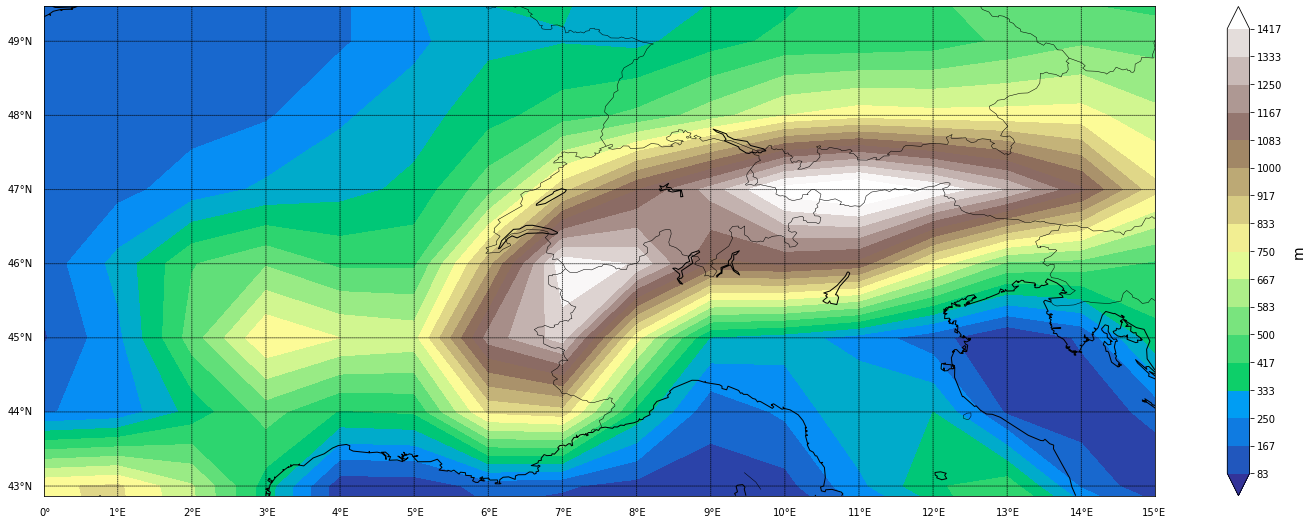

In [34]:
min_height = 0
max_height =1500

mf = Mapfigure(lon=np.array(lons), lat=np.array(lats))
fig = plt.figure(figsize=(25,9))
#plt.title(title)
cnt = plt.contourf(lons_ERA, lats_ERA, topo_cut, 20, cmap=plt.cm.get_cmap('terrain'), vmin=min_height, vmax=max_height)
m = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('terrain', 20))
m.set_array(topo_cut)
m.set_clim(min_height, max_height)
#plt.cm.get_cmap("rocket", 25)
cbar = plt.colorbar(m,
                    boundaries=np.round(np.linspace(min_height, max_height, 19),1),
                    ticks=np.round(np.linspace(min_height, max_height, 19),1),
                    extend="both", fraction=0.0188, pad=0.03)
cbar.set_label("m", rotation=90, labelpad=10, fontsize=14)
mf.drawmap(nbrem=1, nbrep=1)

In [33]:
topo_cut.max()

1637.0524